In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import visualization as vis
from datetime import datetime


pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('files/data-hotel.csv', index_col=0)

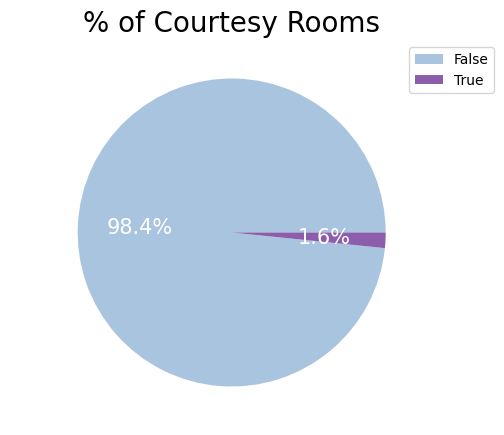

In [3]:
vis.pie(df['courtesy'].value_counts(), df['courtesy'].value_counts().index, 15, 'white', df, 'BuPu', '% of Courtesy Rooms', 'Black', 20, 0, (5,5))

El porcentaje de habitaciones que el hotel ofrece por cortesía (a coste 0 para los clientes) es del 1.6%. A pesar de su baja representación, no incluiremos esas habitaciones en el siguiente análisis al entender que su cancelación (o no) no afecta a los beneficios del hotel

In [4]:
df = df[df['courtesy'] == False]

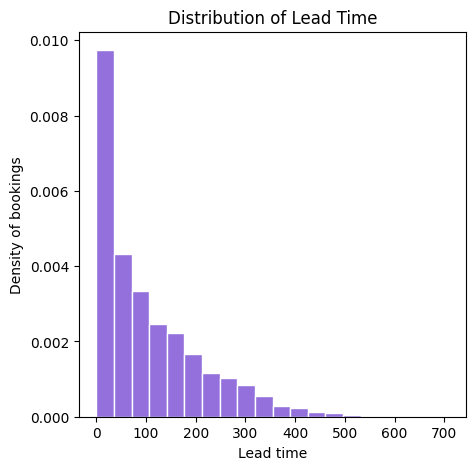

In [5]:
vis.hist('lead_time', df, 'mediumpurple', 'white', True, 20, 'Lead time' , 'Density of bookings', 'Distribution of Lead Time', (5,5))

Observamos que **la mayoría de reservas a los hoteles se realizan con una antelación de no más de 50 días**. Conforme el plazo entre la reserva y la llegada aumenta, el número de reservas disminuye considerablemente.

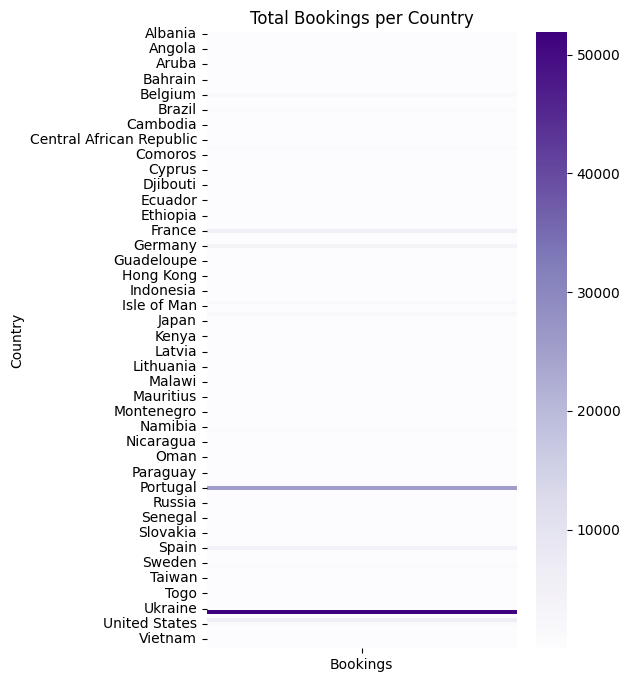

In [6]:
# Crea un DataFrame que contenga el número de reservas por país
heatmap_data = df['country'].value_counts().reset_index()
heatmap_data.columns = ['Country', 'Bookings']

# Crea el heatmap
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(heatmap_data.pivot_table(index='Country', values='Bookings', aggfunc='sum'), cmap="Purples", annot=False, fmt='d')
heatmap.set_title('Total Bookings per Country')
heatmap.set_xlabel('')
heatmap.set_ylabel('Country');

**La mayoría de reservas provienen de Ucrania y Portugal**. A ambos países les siguen, de lejos, Francia, España, Alemania, Estados Unidos y Japón (todos ellos con menos de 2500 reservas).

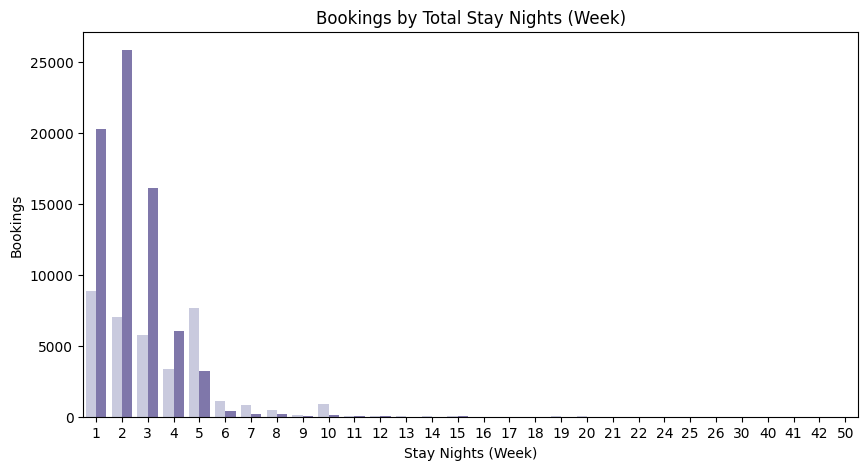

In [7]:
df_filtered1 = df[df['stays_in_week_nights'] != 0]

vis.countplot('stays_in_week_nights', df_filtered1, 'Purples', 'hotel', True, None, 'Stay Nights (Week)', 'Bookings', 'Bookings by Total Stay Nights (Week)', 0, (10,5))

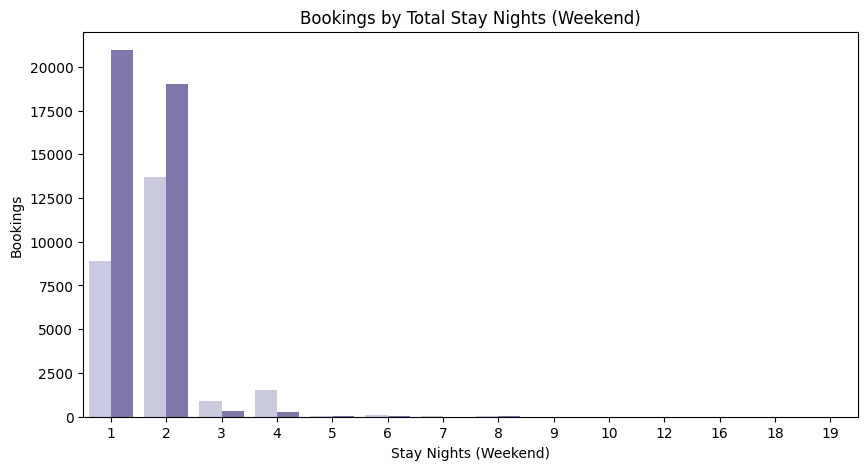

In [8]:
df_filtered2 = df[df['stays_in_weekend_nights'] != 0]

vis.countplot('stays_in_weekend_nights', df_filtered2, 'Purples', 'hotel', True, None, 'Stay Nights (Weekend)', 'Bookings', 'Bookings by Total Stay Nights (Weekend)', 0, (10,5))

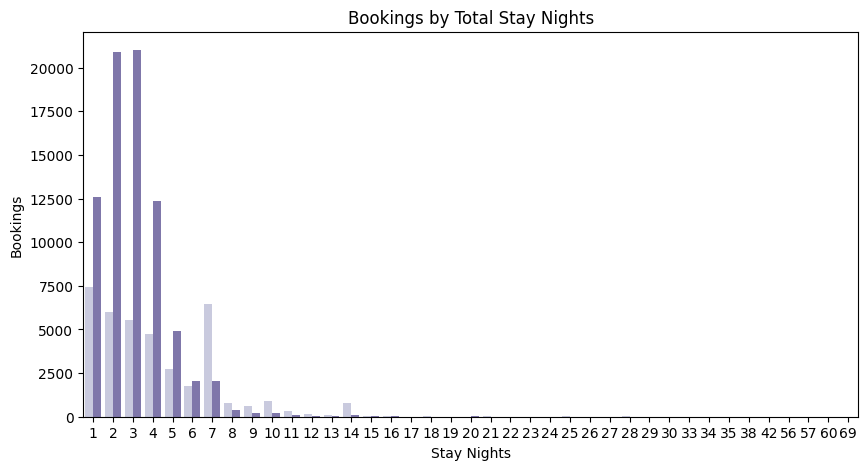

In [9]:
df_copy = df.copy()

df_copy['total_stay_nights'] = df_copy['stays_in_weekend_nights'] + df['stays_in_week_nights']

df_filtered3 = df_copy[df_copy['total_stay_nights'] != 0]

vis.countplot('total_stay_nights', df_filtered3, 'Purples', 'hotel', True, None, 'Stay Nights', 'Bookings', 'Bookings by Total Stay Nights', 0, (10,5))

En total los clientes suelen reservar entre 1 y 4 noches en los hoteles. Sí se aprecian diferencias respecto al hotel:
- Resort Hotel: Las reservas suelen durar entre 1 y 5 noches, siendo ambos extremos los más reservados. Existe diferencia entre el número de días entre semana (mayor) y el fin de semana (menor)
- City Hotel: Las reservas suelen durar entre 2 y 3 noches. No existe diferencia significativa entre el número de días entre semanay el fin de semana

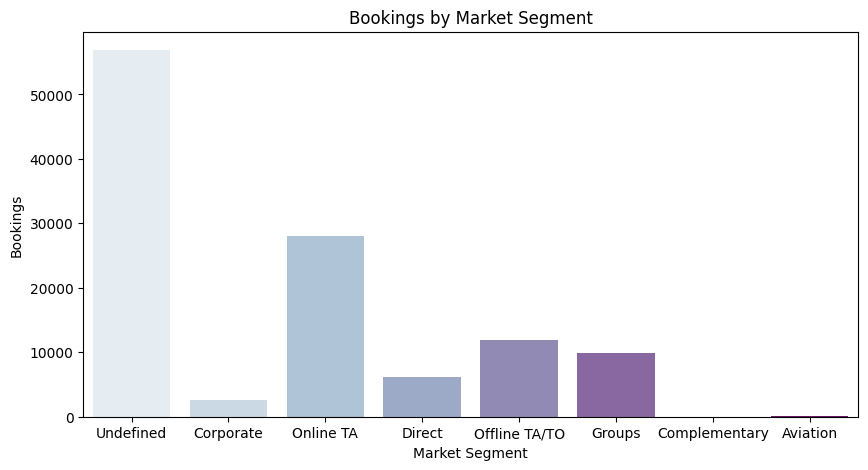

In [10]:
vis.countplot('market_segment', df, 'BuPu', 'market_segment', True, None, 'Market Segment', 'Bookings', 'Bookings by Market Segment', 0, (10,5))

Un elevado número de nuestros datos no tienen un segmento de mercado definido. Sería recomendable tratar de recoger la información de un modo en el que no se perdieran tantos datos. Aún así, respecto a la información de la que disponemos: La mayoría de reservas pertenecen al segmeneto de mercado Online TA.

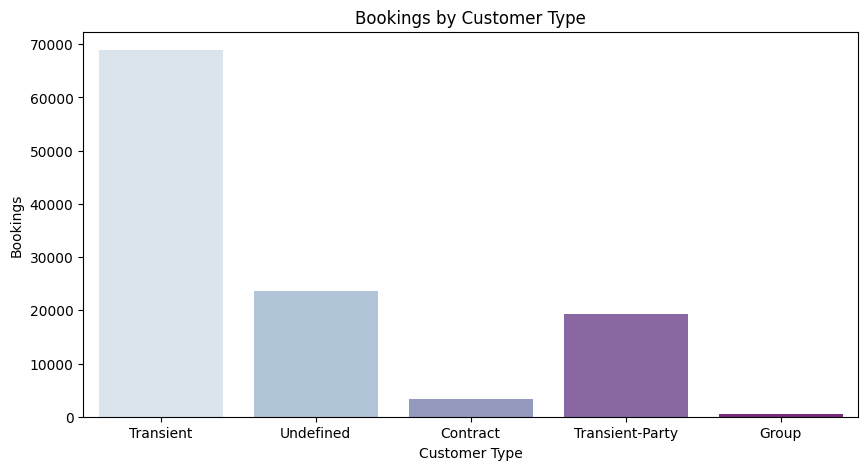

In [11]:
vis.countplot('customer_type', df, 'BuPu', 'customer_type', True, None, 'Customer Type', 'Bookings', 'Bookings by Customer Type', 0, (10,5))

En este caso se observa que la mayoría de clientes pertenecen a la categoría de **transient**, entendido como "un tipo de cliente que realiza reservas individuales y que no forma parte de un grupo o contrato a largo plazo". 

In [12]:
df['is_canceled'] = df['is_canceled'].map({True : 1, False : 0})

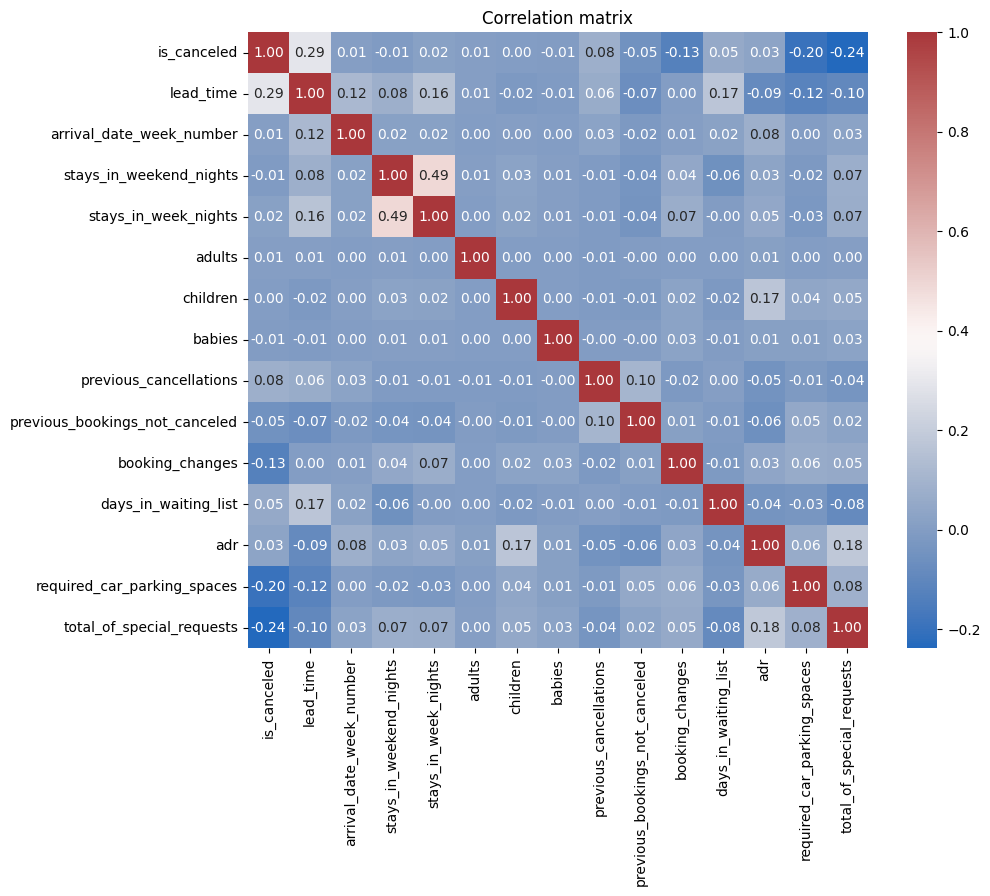

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f")
plt.title('Correlation matrix');

Según el gráfico de correlación, existe una relación moderada positiva entre las variables `stays_in_weekend_nights` y `stays_in_week_nights`. Cuando una aumenta, la otra tiende a aumentar también.
Otras correlaciones positivas interesantes, aunque débiles, son:
- `lead_time` y `days_in_waiting_list`
- `lead_time`y `stays_in_week_nights`
- `children` y `adr`
- `adr` y `total_of_special_requests`

### Resumen

Basándonos en las observaciones proporcionadas, podemos crear un perfil general del cliente del hotel:

**Anticipación en la reserva:**

La mayoría de los clientes tienden a reservar con una antelación de no más de 50 días. Esto sugiere que muchos clientes prefieren planificar sus viajes con relativamente poca anticipación.

**Origen de las reservas:**

La mayoría de las reservas provienen de Ucrania y Portugal, seguidas por Francia, España, Alemania, Estados Unidos y Japón, aunque en menor cantidad. Esto indica una diversidad en la base de clientes, pero con una concentración significativa de reservas de algunos países específicos.

**Duración de las estancias:**

En general, los clientes suelen reservar entre 1 y 4 noches en los hoteles. Sin embargo, hay diferencias entre los tipos de hoteles:

- Para los Resort Hotels, las estancias suelen durar entre 1 y 5 noches, con una diferencia entre los días de semana y los fines de semana.
- Para los City Hotels, las estancias suelen durar entre 2 y 3 noches, sin diferencia significativa entre los días de semana y los fines de semana.

**Segmento de mercado y tipo de cliente:**

La mayoría de las reservas no tienen un segmento de mercado definido, pero entre los que están definidos, el segmento de mercado más común es Online Travel Agencies (TA). Además, la mayoría de los clientes pertenecen al tipo de cliente "transient", lo que sugiere que son viajeros individuales que no forman parte de un grupo o contrato a largo plazo.

**Correlaciones interesantes:**

Existe una correlación moderada positiva entre las variables stays_in_weekend_nights y stays_in_week_nights, lo que indica que cuando una aumenta, la otra tiende a aumentar también.

Otras correlaciones positivas, aunque débiles, incluyen lead_time y days_in_waiting_list, lead_time y stays_in_week_nights, children y adr, y adr y total_of_special_requests.

El perfil general del cliente del hotel se caracteriza por reservas realizadas con poca anticipación, una base diversa de clientes con una concentración significativa de algunos países, estancias de corta duración con diferencias entre tipos de hoteles, predominio de reservas a través de Online Travel Agencies, y clientes principalmente del tipo *transient*. 

### Análisis sobre Cancelaciones

In [14]:
df['is_canceled'] = df['is_canceled'].map({1 : True, 0 : False})

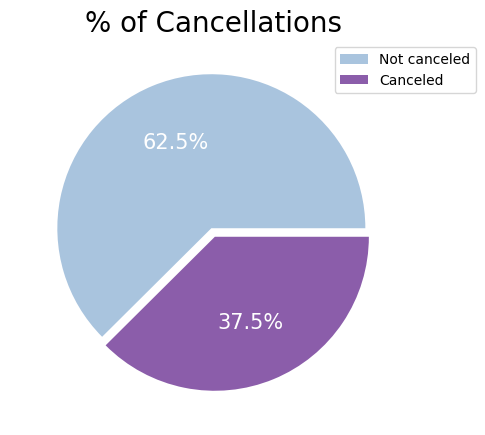

In [15]:
vis.pie(df['is_canceled'].value_counts(), ['Not canceled', 'Canceled'], 15, 'white', df, 'BuPu', '% of Cancellations', 'Black', 20, 0.03, (5,5))

El porcentaje de cancelaciones es de **37,5%**, un número que podría considerarse relativamente alto. Para conocer el motivo tras ese resultado, primero realizaremos un análisis general de los datos y en base al mismo iremos profundizando en distintas variables.

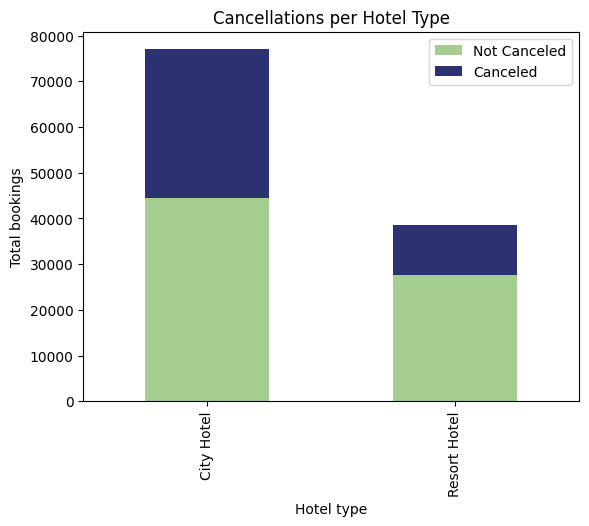

In [16]:
cancelaciones_por_hotel = df.groupby(['hotel', 'is_canceled']).size().unstack()

cancelaciones_por_hotel.plot(kind='bar',
                             stacked=True, 
                             colormap='crest')
plt.xlabel('Hotel type')
plt.ylabel('Total bookings')
plt.title('Cancellations per Hotel Type')
plt.legend(['Not Canceled', 'Canceled'], loc='upper right');

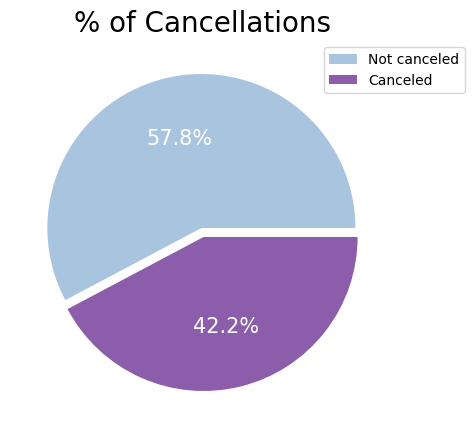

In [17]:
df_city_hotel = df[df['hotel'] == 'City Hotel']

vis.pie(df_city_hotel['is_canceled'].value_counts(), ['Not canceled', 'Canceled'], 15, 'white', df_city_hotel, 'BuPu', '% of Cancellations', 'Black', 20, 0.03, (5,5))

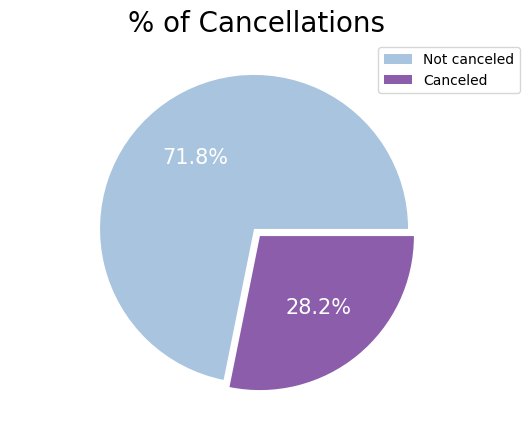

In [18]:
df_resort_hotel = df[df['hotel'] == 'Resort Hotel']

vis.pie(df_resort_hotel['is_canceled'].value_counts(), ['Not canceled', 'Canceled'], 15, 'white', df_resort_hotel, 'BuPu', '% of Cancellations', 'Black', 20, 0.03, (5,5))

In [19]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'courtesy',
       'arrival_date'],
      dtype='object')

In [20]:
df['arrival_date'] = df['arrival_date'].apply(lambda x : '2016-2-28' if x == '2016-2-31' else x)
df['arrival_date'] = df['arrival_date'].apply(lambda x : '2015-2-28' if x == '2015-2-29' else x)
df['reservation_status_date'] = df['reservation_status_date'].apply(lambda x : '2016-2-28' if x == '2016-2-31' else x)
df['reservation_status_date'] = df['reservation_status_date'].apply(lambda x : '2015-2-28' if x == '2015-2-29' else x)

In [21]:
# Definir la función arreglar_dias
def arreglar_dias(x):
    
    dates = ['2030-11-31',
            '2029-04-31',
            '2030-06-31',
            '2030-09-31',
            '2025-02-30',
            '2029-11-31',
            '2023-06-31',
            '2029-06-31',
            '2029-02-30',
            '2022-09-31',
            '2024-09-31',
            '2028-04-31',
            '2024-06-31',
            '2025-11-31',
            '2026-09-31',
            '2027-09-31',
            '2023-11-31',
            '2028-09-31',
            '2028-02-30',
            '2026-06-31',
            '2024-04-31',
            '2023-04-31',
            '2025-04-31',
            '2027-04-31',
            '2022-06-31',
            '2024-02-30',
            '2025-09-31',
            '2027-02-30',
            '2030-04-31']
    
    # Definir un diccionario con el último día válido de cada mes
    last_day_of_month = {
        '01': '31', '02': '28', '03': '31', '04': '30', '05': '31', '06': '30',
        '07': '31', '08': '31', '09': '30', '10': '31', '11': '30', '12': '31'
    }
    
    # Verificar si la fecha está en la lista dates
    if x in dates:
        # Obtener el año, mes y día de la fecha
        year, month, day = x.split('-')
        
        # Si el día es 31 o 30, ajustar al último día válido del mes
        if day == '31' or day == '30':
            # Obtener el último día válido del mes correspondiente
            last_day = last_day_of_month[month]
            
            # Devolver la fecha corregida
            return year + '-' + month + '-' + last_day
    
    # Si la fecha no necesita corrección, devolverla sin cambios
    return x

# Aplicar la función arreglar_dias a la columna 'reservation_status_date'
df['reservation_status_date'] = df['reservation_status_date'].apply(arreglar_dias)

In [22]:
df['arrival_date'] = df['arrival_date'].apply(lambda x : datetime(int(x.split('-')[0]), int(x.split('-')[1]), int(x.split('-')[2])))

In [23]:
df['reservation_status_date'] = df['reservation_status_date'].apply(lambda x : datetime(int(x.split('-')[0]), int(x.split('-')[1]), int(x.split('-')[2])))

In [24]:
df.to_csv('files/data-hotel-clean.csv')

In [25]:
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_year'] = df['arrival_date'].dt.year

In [26]:
cancellations_arrival_sum = df[df['is_canceled'] == True].groupby(['arrival_month', 'hotel'])['is_canceled'].sum().reset_index()

In [27]:
cancellations_arrival = df.groupby(['arrival_month', 'hotel'])['is_canceled'].value_counts().reset_index()

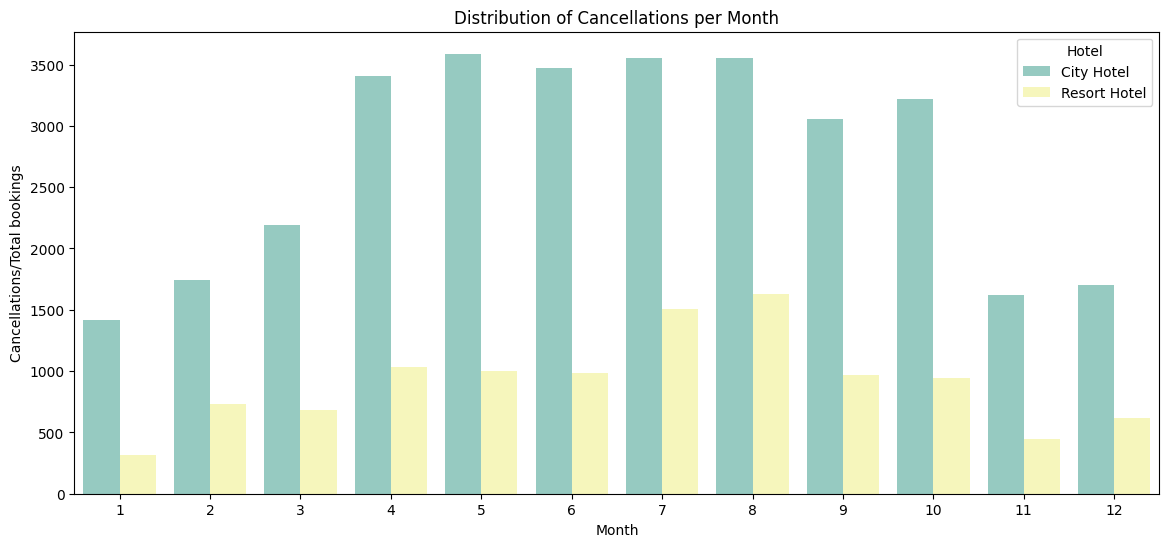

In [28]:
vis.barplot('arrival_month', 'is_canceled', cancellations_arrival_sum, 'Set3', 'hotel', 'Hotel', True, 'Month', 'Cancellations/Total bookings', 'Distribution of Cancellations per Month', (14,6))

En un primer momento podría parecer que los datos de cancelaciones se concentran sobre todo en los meses de verano, pero es precisamente en esos meses donde también aumenta el número de reservas, por lo que revisaremos el % de cancelaciones respecto al total de reservas de cada mes

In [29]:
tabla_contingencia = cancellations_arrival.pivot_table(index=['arrival_month', 'hotel'],
                                                      columns='is_canceled',
                                                      values='count',
                                                      aggfunc='sum',
                                                      fill_value=0)


tabla_contingencia['total'] = tabla_contingencia.sum(axis=1)

# Calcula el total de cancelados y no cancelados por mes y tipo de hotel
tabla_contingencia['total_cancelados'] = tabla_contingencia[1] + tabla_contingencia[0]
tabla_contingencia['total_no_cancelados'] = tabla_contingencia[0] + tabla_contingencia[1]

# Calcula los porcentajes sobre el total de cada mes
tabla_contingencia['% not canceled'] = (tabla_contingencia[0] / tabla_contingencia['total']) * 100
tabla_contingencia['% canceled'] = (tabla_contingencia[1] / tabla_contingencia['total']) * 100

# Elimina las columnas adicionales de totales
tabla_contingencia.drop(columns=['total_cancelados', 'total_no_cancelados', 'total'], inplace=True)


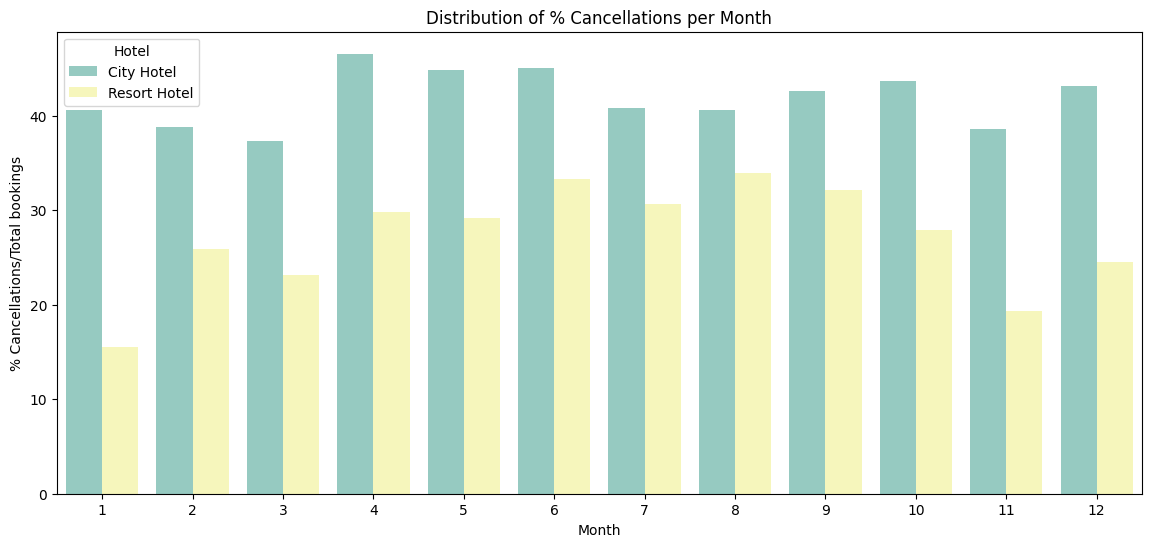

In [30]:
vis.barplot('arrival_month', '% canceled', tabla_contingencia, 'Set3', 'hotel', 'Hotel', True, 'Month', '% Cancellations/Total bookings', 'Distribution of % Cancellations per Month', (14,6))


Una vez revisado esto, no se detecta un patrón tan claro como en el anterior gráfico, pero sí se aprecia que los meses de abril, mayo y junio tienen % más elevados de cancelaciones para City Hotel 

In [31]:
df['lead_group'] = df['lead_time'].apply(lambda x : 'early' if x >= 90 else ('mid' if x >= 30 else 'late'))

In [32]:
cancellations_lead = df.groupby(['lead_group', 'hotel'])['is_canceled'].value_counts().reset_index()

In [33]:
tabla_contingencia_lead = cancellations_lead.pivot_table(index=['lead_group', 'hotel'],
                                                      columns='is_canceled',
                                                      values='count',
                                                      aggfunc='sum',
                                                      fill_value=0)


tabla_contingencia_lead['total'] = tabla_contingencia_lead.sum(axis=1)

# Calcula el total de cancelados y no cancelados por mes y tipo de hotel
tabla_contingencia_lead['total_cancelados'] = tabla_contingencia_lead[1] + tabla_contingencia_lead[0]
tabla_contingencia_lead['total_no_cancelados'] = tabla_contingencia_lead[0] + tabla_contingencia_lead[1]

# Calcula los porcentajes sobre el total de cada mes
tabla_contingencia_lead['% not canceled'] = (tabla_contingencia_lead[0] / tabla_contingencia_lead['total']) * 100
tabla_contingencia_lead['% canceled'] = (tabla_contingencia_lead[1] / tabla_contingencia_lead['total']) * 100

# Elimina las columnas adicionales de totales
tabla_contingencia_lead.drop(columns=['total_cancelados', 'total_no_cancelados', 'total'], inplace=True)


In [34]:
tabla_contingencia_lead

is_canceled              False   True  % not canceled  % canceled
lead_group hotel                                                 
early      City Hotel    15444  19389       44.337266   55.662734
           Resort Hotel   9447   6196       60.391229   39.608771
late       City Hotel    16728   4847       77.534183   22.465817
           Resort Hotel  12450   1838       87.136058   12.863942
mid        City Hotel    12300   8293       59.729034   40.270966
           Resort Hotel   5788   2821       67.231967   32.768033

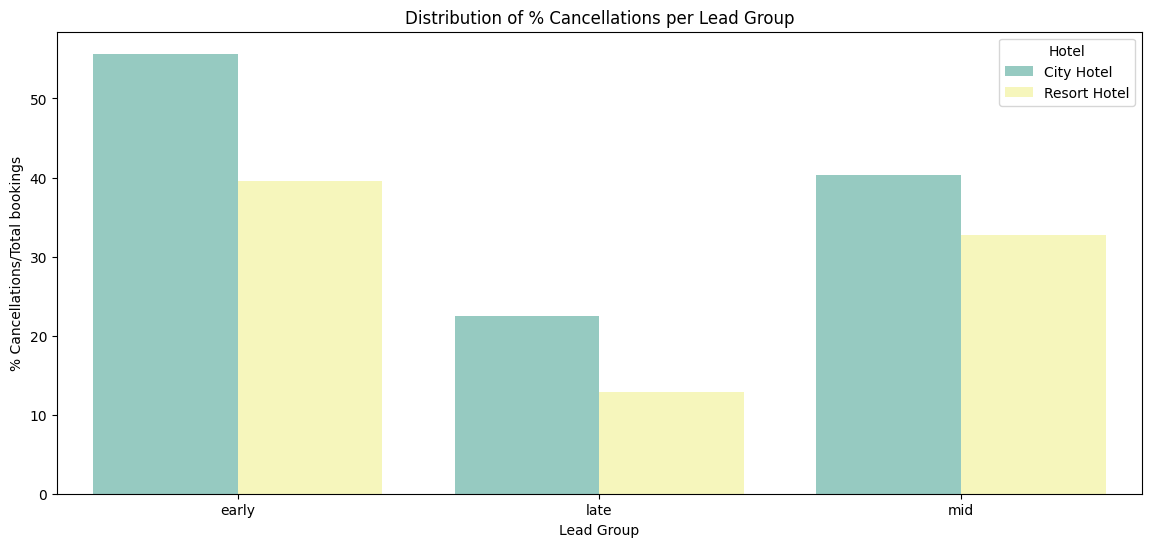

In [35]:
vis.barplot('lead_group', '% canceled', tabla_contingencia_lead, 'Set3', 'hotel', 'Hotel', True, 'Lead Group', '% Cancellations/Total bookings', 'Distribution of % Cancellations per Lead Group', (14,6))

En este caso sí se aprecia que existe un mayor % de cancelaciones en el grupo de clientes early (que hace sus reservas con una antelación >= a 90 días de la fecha de llegada)

In [36]:
cancellations_customer = df.groupby(['customer_type', 'hotel'])['is_canceled'].value_counts().reset_index()
cancellations_customer_sum = df[df['is_canceled'] == True].groupby(['customer_type', 'hotel'])['is_canceled'].sum().reset_index()

In [37]:
cancellations_customer = cancellations_customer.pivot_table(index=['customer_type', 'hotel'],
                                                      columns='is_canceled',
                                                      values='count',
                                                      aggfunc='sum',
                                                      fill_value=0)


cancellations_customer['total'] = cancellations_customer.sum(axis=1)

# Calcula el total de cancelados y no cancelados por mes y tipo de hotel
cancellations_customer['total_cancelados'] = cancellations_customer[1] + cancellations_customer[0]
cancellations_customer['total_no_cancelados'] = cancellations_customer[0] + cancellations_customer[1]

# Calcula los porcentajes sobre el total de cada mes
cancellations_customer['% not canceled'] = (cancellations_customer[0] / cancellations_customer['total']) * 100
cancellations_customer['% canceled'] = (cancellations_customer[1] / cancellations_customer['total']) * 100

# Elimina las columnas adicionales de totales
cancellations_customer.drop(columns=['total_cancelados', 'total_no_cancelados', 'total'], inplace=True)


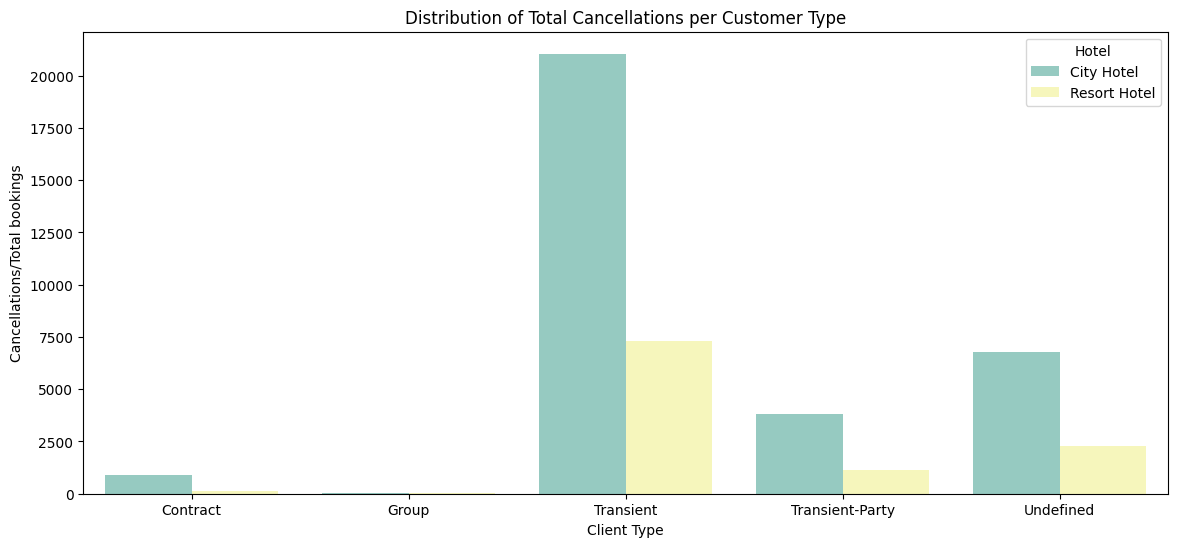

In [38]:
vis.barplot('customer_type', 'is_canceled', cancellations_customer_sum, 'Set3', 'hotel', 'Hotel', True, 'Client Type', 'Cancellations/Total bookings', 'Distribution of Total Cancellations per Customer Type', (14,6))

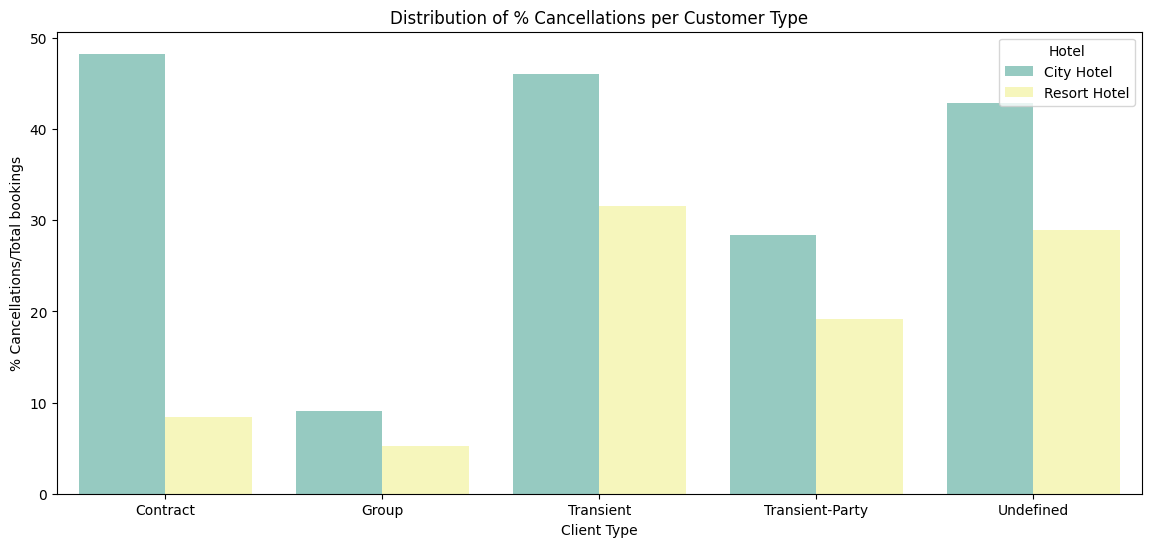

In [39]:
vis.barplot('customer_type', '% canceled', cancellations_customer, 'Set3', 'hotel', 'Hotel', True, 'Client Type', '% Cancellations/Total bookings', 'Distribution of % Cancellations per Customer Type', (14,6))

El tipo de cliente que más cancela respecto al total de sus reservas es '**Contract**' (suelen ser empresas, organizaciones o agencias que necesitan reservar habitaciones de hotel de manera regular para sus empleados, clientes o asociados). Sin embargo, cabe destacar que es el tipo '**Transient**' (pueden incluir viajeros individuales, familias en vacaciones, grupos turísticos, viajeros de negocios que no tienen un acuerdo contractual específico con el hotel, entre otros) el que más afecta a la compañía pues tanto su % de cancelaciones respecto a sus reservas es alto como el número total de cancelaciones realizadas

In [40]:
cancellations_country = df.groupby(['country', 'hotel'])['is_canceled'].value_counts().reset_index()
cancellations_country_sum = df[df['is_canceled'] == True].groupby(['country', 'hotel'])['is_canceled'].sum().reset_index()

In [41]:
cancellations_country = cancellations_country.pivot_table(index=['country', 'hotel'],
                                                      columns='is_canceled',
                                                      values='count',
                                                      aggfunc='sum',
                                                      fill_value=0)


cancellations_country['total'] = cancellations_country.sum(axis=1)

# Calcula el total de cancelados y no cancelados por mes y tipo de hotel
cancellations_country['total_cancelados'] = cancellations_country[1] + cancellations_country[0]
cancellations_country['total_no_cancelados'] = cancellations_country[0] + cancellations_country[1]

# Calcula los porcentajes sobre el total de cada mes
cancellations_country['% not canceled'] = (cancellations_country[0] / cancellations_country['total']) * 100
cancellations_country['% canceled'] = (cancellations_country[1] / cancellations_country['total']) * 100

# Elimina las columnas adicionales de totales
cancellations_country.drop(columns=['total_cancelados', 'total_no_cancelados', 'total'], inplace=True)

In [42]:
cancellations_country_sorted2 = cancellations_country.sort_values(by=True, ascending=False)

In [43]:
cancellations_country_sorted2_top_20 = cancellations_country_sorted2.head(20)

In [44]:
cancellations_country_sorted2_top_20.sort_values(by='% canceled', ascending=False)

is_canceled                  False   True  % not canceled  % canceled
country        hotel                                                 
Portugal       City Hotel     5398  10859       33.204158   66.795842
               Resort Hotel   5295   3980       57.088949   42.911051
China          City Hotel      438    329       57.105606   42.894394
Undefined      City Hotel    19894  14565       57.732378   42.267622
Brazil         City Hotel      561    379       59.680851   40.319149
Italy          City Hotel     1122    679       62.298723   37.701277
Ireland        City Hotel      430    218       66.358025   33.641975
United Kingdom City Hotel     2047    879       69.958988   30.041012
Spain          City Hotel     1786    709       71.583166   28.416834
Undefined      Resort Hotel  12544   4882       71.984391   28.015609
United States  City Hotel      644    245       72.440945   27.559055
Switzerland    City Hotel      545    180       75.172414   24.827586
Belgium        City Hotel      811    243       76.944972   23.055028
Spain          Resort Hotel   1676    482       77.664504   22.335496
Netherlands    City Hotel      685    182       79.008074   20.991926
Ireland        Resort Hotel    906    235       79.404032   20.595968
France         City Hotel     3879    945       80.410448   19.589552
Germany        City Hotel     2712    569       82.657726   17.342274
France         Resort Hotel    755    123       85.990888   14.009112
United Kingdom Resort Hotel   3108    489       86.405338   13.594662

Del top 20 de países con más cancelaciones observamos que aquellos con más tasa de cancelación son:

- Portugal 66.7% (City Hotel), 42.9% (Resort Hotel) 
- China 42.9% (City Hotel) 
- Brasil 40.3% (City Hotel) 

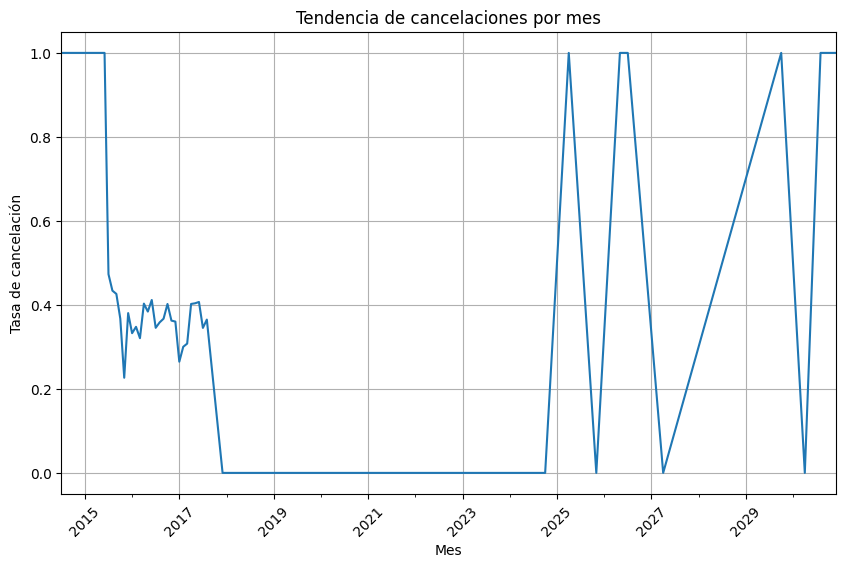

In [45]:
# Agrupar por mes y calcular la tasa de cancelación
cancelaciones_por_mes = df.groupby(df['arrival_date'].dt.to_period('M'))['is_canceled'].mean()

# Visualizar la tendencia temporal
cancelaciones_por_mes.plot(kind='line', figsize=(10, 6))
plt.title('Tendencia de cancelaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Tasa de cancelación')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [47]:
# Suponiendo que df es tu DataFrame
df['year_month'] = pd.to_datetime(df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str), format='%Y-%m').dt.to_period('M')

In [48]:
df_city = df[df['hotel'] == 'City Hotel']
df_city.sort_values('year_month', ascending=True, inplace=True)

C:\Users\marin\AppData\Local\Temp\ipykernel_37996\1101616128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.sort_values('year_month', ascending=True, inplace=True)


In [49]:
for year_month in df_city['year_month'].unique():
    print("")
    df_segmentado = df_city[df_city['year_month'] == year_month]
    print(f"ANALYSING: {year_month}")
    print("")
    print(round((df_segmentado['country'].value_counts()[:5] / df_segmentado.shape[0]) * 100,2))
    print("")
    print(round((df_segmentado['agent'].value_counts()[:5] / df_segmentado.shape[0]) * 100,2))
    print("")
    print(round((df_segmentado['market_segment'].value_counts()[:5] / df_segmentado.shape[0]) * 100,2))
    print("")
    print(round((df_segmentado['distribution_channel'].value_counts()[:5] / df_segmentado.shape[0]) * 100,2))
    print("")
    print(round((df_segmentado['customer_type'].value_counts()[:5] / df_segmentado.shape[0]) * 100,2))
    print("")
    print(round((df_segmentado['meal'].value_counts()[:5] / df_segmentado.shape[0]) * 100,2))
    print("")
    print('adr')
    print(df_segmentado['adr'].mean())
    print("")
    print('total_of_special_requests')
    print(df_segmentado['total_of_special_requests'].mean())
    print("")
    print('children')
    print(df_segmentado['children'].mean())
    print("")
    print('babies')
    print(df_segmentado['babies'].mean())
    print("")
    print("----------------------------------------------------------")


ANALYSING: 2014-07

country
Portugal     64.29
Undefined    35.71
Name: count, dtype: float64

agent
1.0    100.0
Name: count, dtype: float64

market_segment
Groups       52.38
Undefined    47.62
Name: count, dtype: float64

distribution_channel
TA/TO        92.86
Undefined     7.14
Name: count, dtype: float64

customer_type
Transient-Party    80.95
Undefined          19.05
Name: count, dtype: float64

meal
BB    100.0
Name: count, dtype: float64

adr
62.80000000000001

total_of_special_requests
0.0

children
0.0

babies
0.0

----------------------------------------------------------

ANALYSING: 2014-08

country
Portugal     55.56
Undefined    44.44
Name: count, dtype: float64

agent
1.0    100.0
Name: count, dtype: float64

market_segment
Groups       59.26
Undefined    40.74
Name: count, dtype: float64

distribution_channel
TA/TO        81.48
Undefined    18.52
Name: count, dtype: float64

customer_type
Transient-Party    77.78
Undefined          22.22
Name: count, dtype: float64

m

### Gráfico de cancelaciones por país

In [51]:
df_portugal = df[df['country'] == 'Portugal']

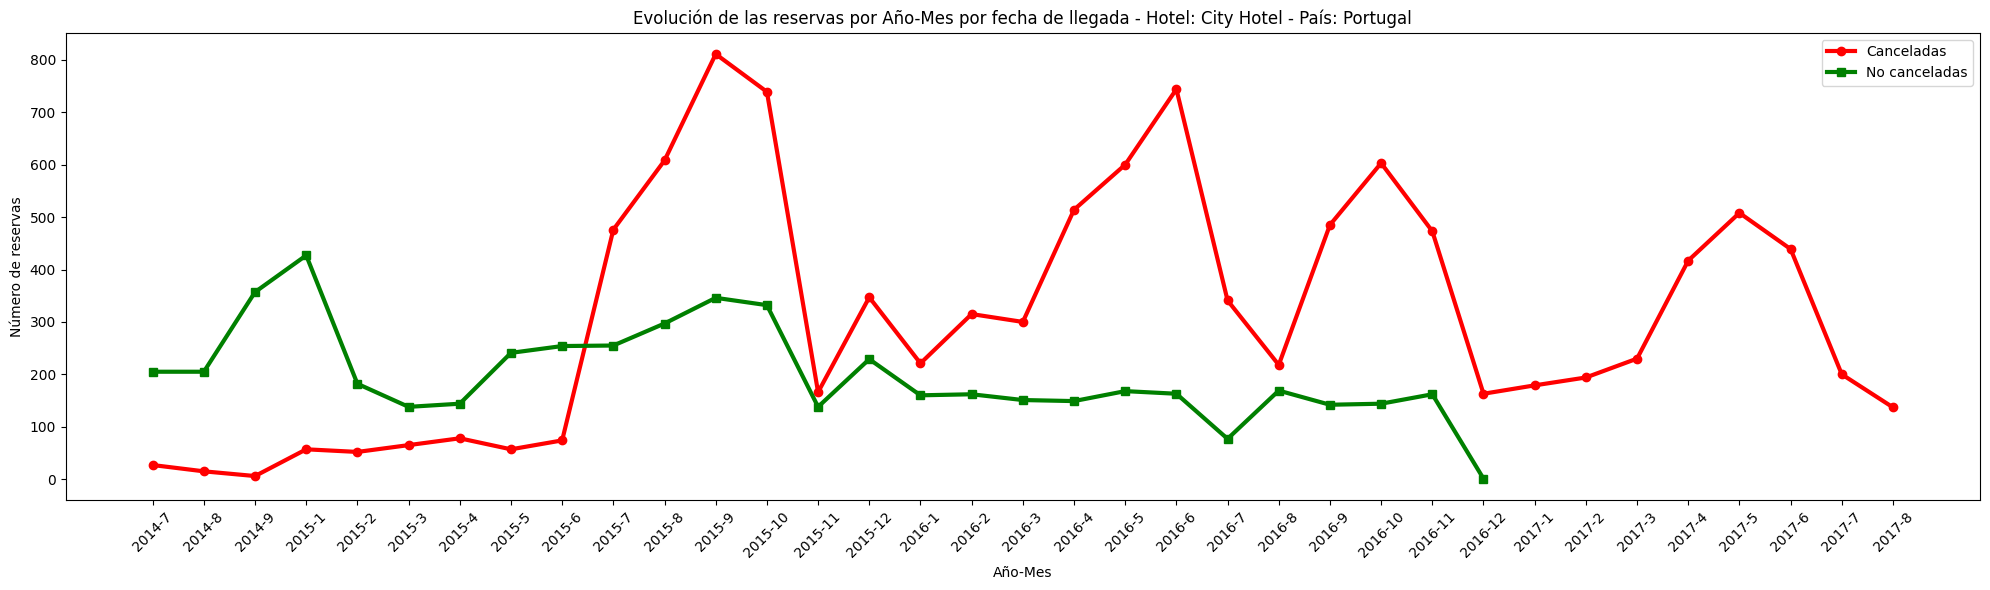

In [53]:
# Segundo conjunto de datos basado en la fecha de llegada y el hotel
cancelada_llegada = df_portugal[(df_portugal["is_canceled"] == True) & (df_portugal["hotel"] == "City Hotel")].groupby([df_portugal["arrival_date"].dt.year, df_portugal["arrival_date"].dt.month])["is_canceled"].count()
no_cancelada_llegada = df_portugal[(df_portugal["is_canceled"] == False) & (df_portugal["hotel"] == "City Hotel")].groupby([df_portugal["arrival_date"].dt.year, df_portugal["arrival_date"].dt.month])["is_canceled"].count()

etiquetas_x_llegada = [f'{año}-{mes}' for año, mes in cancelada_llegada.index]
posiciones_x_llegada = list(range(len(etiquetas_x_llegada)))

plt.figure(figsize=(20, 6))

# Trazar la línea para is_canceled == True (fecha de llegada)
cancelada_llegada.plot(kind='line', marker='o', linestyle='-', color='red', linewidth=3, label='Canceladas')
# Trazar la línea para is_canceled == False (fecha de llegada)
no_cancelada_llegada.plot(kind='line', marker='s', linestyle='-', color='green', linewidth=3, label='No canceladas')

plt.title('Evolución de las reservas por Año-Mes por fecha de llegada - Hotel: City Hotel - País: Portugal')
plt.xlabel('Año-Mes')
plt.ylabel('Número de reservas')

plt.xticks(posiciones_x_llegada, etiquetas_x_llegada, color="black", fontsize=10, rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

Algo pasó con los clientes portugueses, ya que empezaron a cancelar sus reservas de forma drástica a partir de junio de 2005. Desde ese momento, nunca ha habido más reservas confirmadas que reservas canceladas

In [92]:
df_portugal = df_portugal[df_portugal['hotel'] == 'City Hotel']

In [104]:
df_world = df[df['country'] != 'Portugal']
df_world = df_world[df_world['hotel'] == 'City Hotel']

In [95]:
cancel_rate_portugal = df_portugal['is_canceled'].mean() * 100
cancel_rate_world = df_world['is_canceled'].mean() * 100

print("Tasa de cancelación en Portugal:", cancel_rate_portugal, "%")
print("Tasa de cancelación en el resto del mundo:", cancel_rate_world, "%")

Tasa de cancelación en Portugal: 66.7958417912284 %
Tasa de cancelación en el resto del mundo: 35.67430528118003 %


In [113]:
numerical_describe = df_portugal.describe().T
numerical_describe

,count,mean,min,25%,50%,75%,max,std
lead_time,16257.0,140.069201,0.0,28.0,99.0,233.0,629.0,133.455129
arrival_date_week_number,16257.0,27.985483,1.0,20.0,28.0,38.0,53.0,12.315985
stays_in_weekend_nights,16257.0,0.616719,0.0,0.0,0.0,1.0,9.0,0.813834
stays_in_week_nights,16257.0,1.942056,0.0,1.0,2.0,2.0,25.0,1.213528
adults,16257.0,6.110106,0.0,2.0,2.0,2.0,59.0,14.535341
children,16257.0,0.030448,0.0,0.0,0.0,0.0,19.0,0.367036
babies,16257.0,0.01384,0.0,0.0,0.0,0.0,19.0,0.395898
previous_cancellations,16257.0,0.132005,0.0,0.0,0.0,0.0,21.0,0.570709
previous_bookings_not_canceled,16257.0,0.259211,0.0,0.0,0.0,0.0,72.0,2.367265
booking_changes,16257.0,0.127514,0.0,0.0,0.0,0.0,19.0,0.571783


In [114]:
numerical_describe_w = df_world.describe().T
numerical_describe_w

,count,mean,min,25%,50%,75%,max,std
lead_time,60744.0,103.47147,0.0,24.0,71.0,153.0,629.0,102.887997
arrival_date_week_number,60744.0,27.109525,1.0,18.0,28.0,35.0,53.0,12.351786
stays_in_weekend_nights,60744.0,0.851771,0.0,0.0,1.0,2.0,16.0,0.891394
stays_in_week_nights,60744.0,2.26745,0.0,1.0,2.0,3.0,41.0,1.479953
adults,60744.0,6.274776,0.0,2.0,2.0,2.0,59.0,14.569199
children,60744.0,0.069422,0.0,0.0,0.0,0.0,18.0,0.455415
babies,60744.0,0.012413,0.0,0.0,0.0,0.0,19.0,0.34473
previous_cancellations,60744.0,0.039625,0.0,0.0,0.0,0.0,19.0,0.455512
previous_bookings_not_canceled,60744.0,0.071283,0.0,0.0,0.0,0.0,71.0,1.305016
booking_changes,60744.0,0.207016,0.0,0.0,0.0,0.0,19.0,0.698348


In [111]:
categorical_describe = df_portugal.describe(include=['object', 'category']).T
categorical_describe

,count,unique,top,freq
hotel,16257,1,City Hotel,16257
meal,16257,4,BB,13944
country,16257,1,Portugal,16257
market_segment,16257,8,Undefined,7944
distribution_channel,16257,5,TA/TO,12296
reserved_room_type,16257,8,A,9912
assigned_room_type,16257,8,A,13804
agent,16257,163,1.0,3183
customer_type,16257,5,Transient,8622
reservation_status,16257,3,Canceled,10572


In [112]:
categorical_describe_w = df_world.describe(include=['object', 'category']).T
categorical_describe_w

,count,unique,top,freq
hotel,60744,1,City Hotel,60744
meal,60744,4,BB,46473
country,60744,152,Undefined,34459
market_segment,60744,8,Undefined,29870
distribution_channel,60744,5,TA/TO,47963
reserved_room_type,60744,8,A,30901
assigned_room_type,60744,8,A,41774
agent,60744,213,9.0,29627
customer_type,60744,5,Transient,37108
reservation_status,60744,3,Check-Out,39074


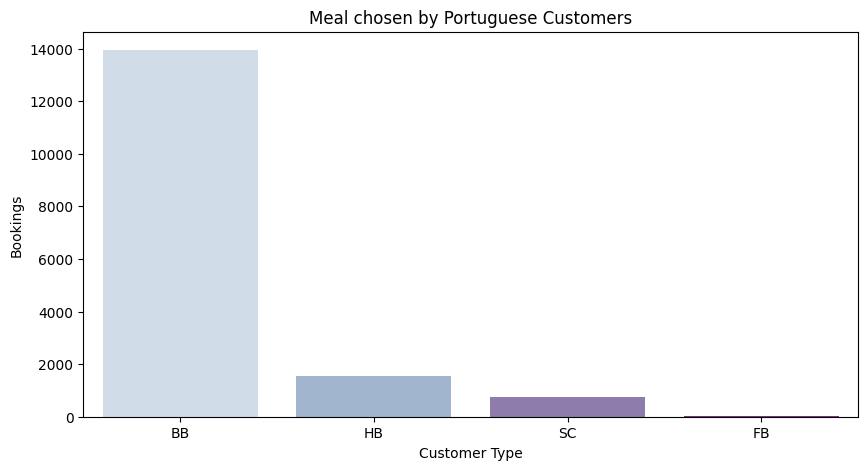

In [105]:
vis.countplot('meal', df_portugal, 'BuPu', 'meal', True, None, 'Customer Type', 'Bookings', 'Meal chosen by Portuguese Customers', 0, (10,5))

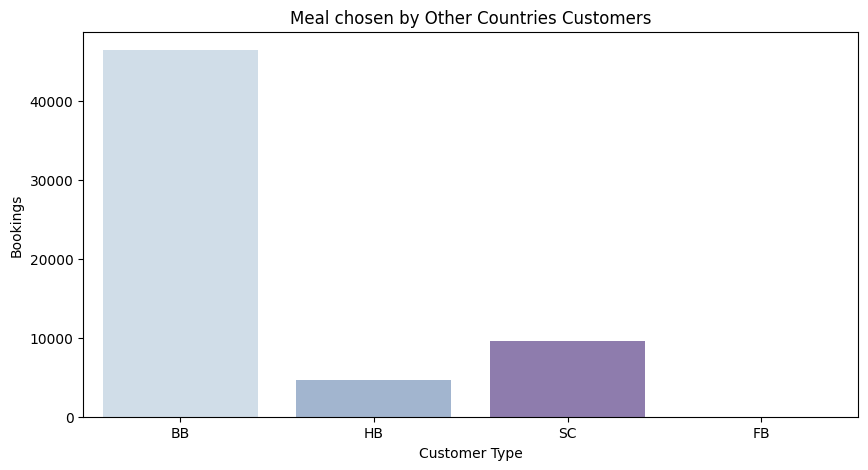

In [106]:
vis.countplot('meal', df_world, 'BuPu', 'meal', True, None, 'Customer Type', 'Bookings', 'Meal chosen by Other Countries Customers', 0, (10,5))

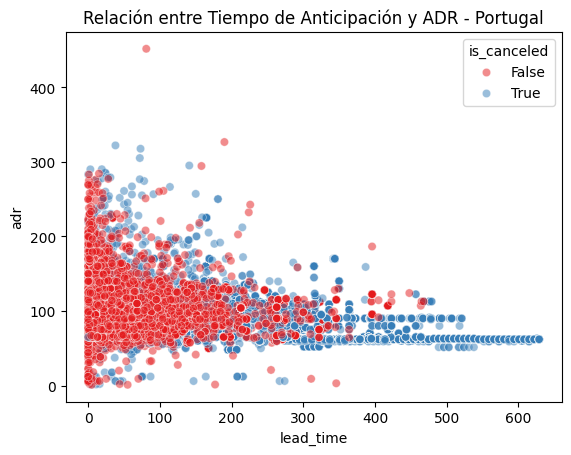

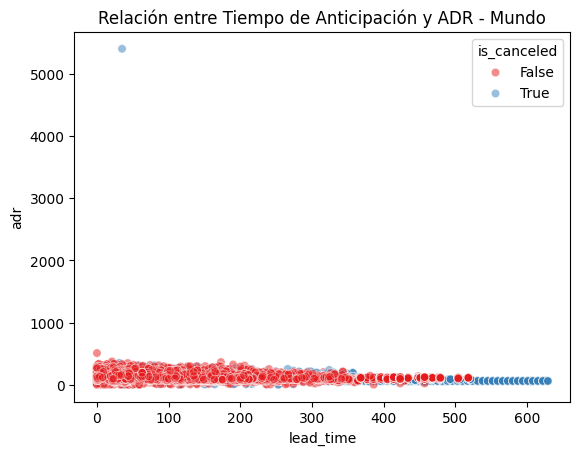

In [107]:
sns.scatterplot(x='lead_time', y='adr', hue='is_canceled', data=df_portugal, palette='Set1', alpha=0.5)
plt.title("Relación entre Tiempo de Anticipación y ADR - Portugal")
plt.show()

sns.scatterplot(x='lead_time', y='adr', hue='is_canceled', data=df_world, palette='Set1', alpha=0.5)
plt.title("Relación entre Tiempo de Anticipación y ADR - Mundo")
plt.show()


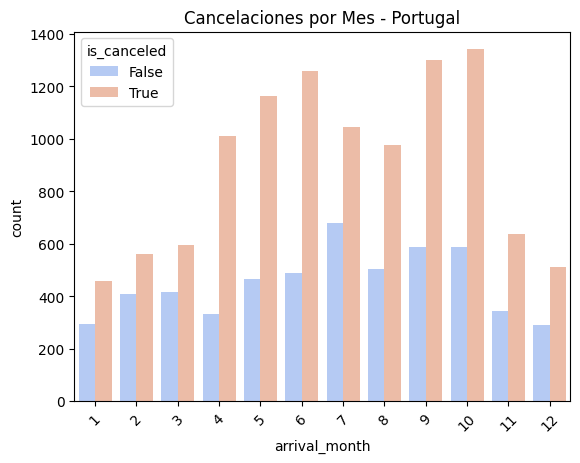

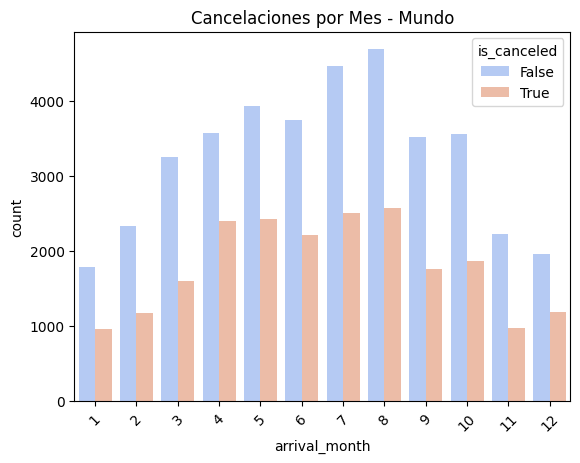

In [109]:
sns.countplot(x='arrival_month', hue='is_canceled', data=df_portugal, palette='coolwarm')
plt.title("Cancelaciones por Mes - Portugal")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='arrival_month', hue='is_canceled', data=df_world, palette='coolwarm')
plt.title("Cancelaciones por Mes - Mundo")
plt.xticks(rotation=45)
plt.show()


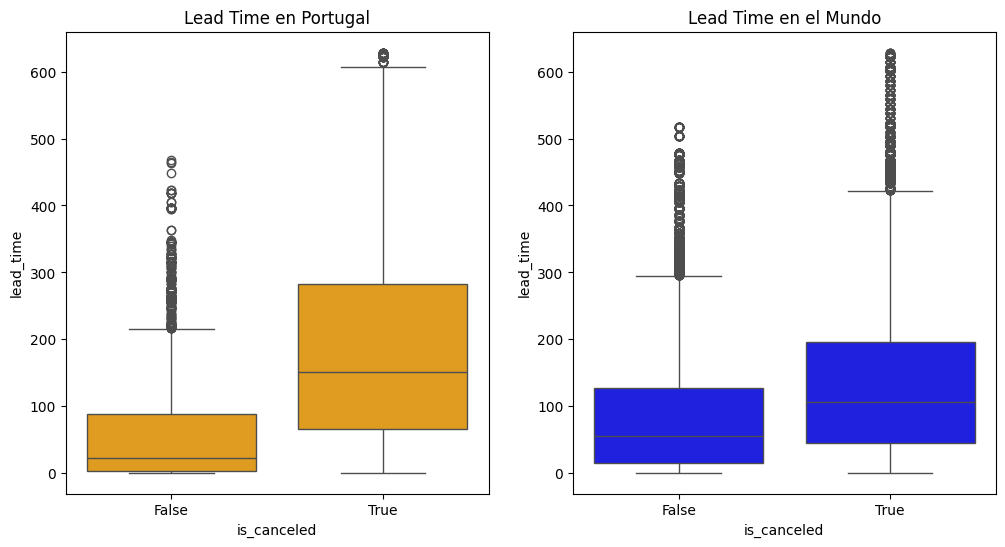

In [96]:
# Crear subgráficos para dos boxplots en la misma figura
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot para lead_time
sns.boxplot(x='is_canceled', y='lead_time', data=df_portugal, ax=ax[0], color='orange')
ax[0].set_title("Lead Time en Portugal")
sns.boxplot(x='is_canceled', y='lead_time', data=df_world, ax=ax[1], color='blue')
ax[1].set_title("Lead Time en el Mundo")

plt.show()

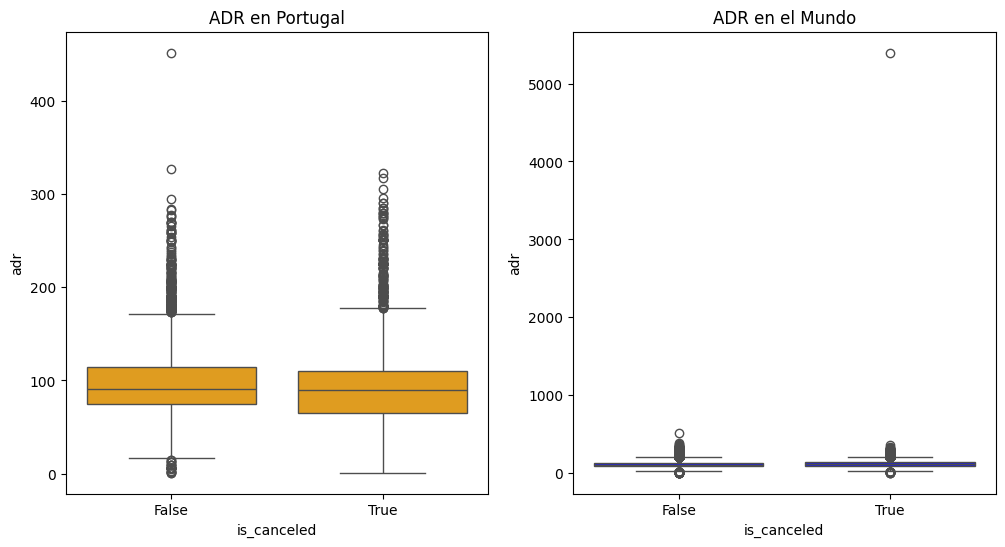

In [97]:
# Crear subgráficos para dos boxplots en la misma figura
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot para adr (Average Daily Rate)
sns.boxplot(x='is_canceled', y='adr', data=df_portugal, ax=ax[0], color='orange')
ax[0].set_title("ADR en Portugal")
sns.boxplot(x='is_canceled', y='adr', data=df_world, ax=ax[1], color='blue')
ax[1].set_title("ADR en el Mundo")

plt.show()

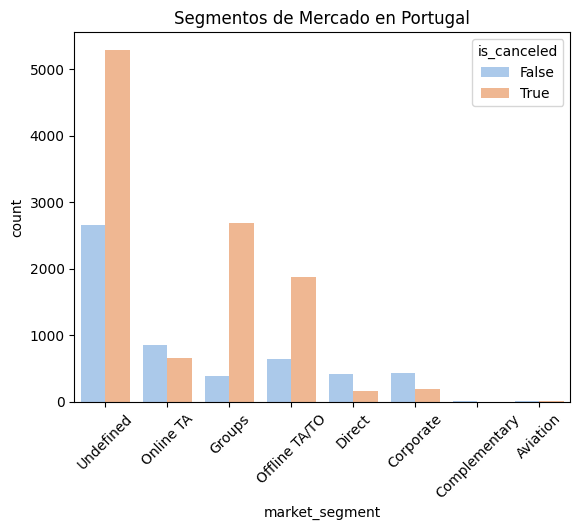

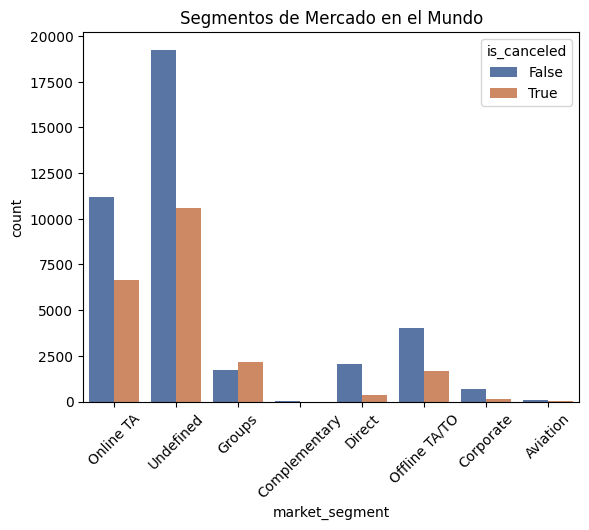

In [98]:
sns.countplot(x='market_segment', hue='is_canceled', data=df_portugal, palette='pastel')
plt.title("Segmentos de Mercado en Portugal")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='market_segment', hue='is_canceled', data=df_world, palette='deep')
plt.title("Segmentos de Mercado en el Mundo")
plt.xticks(rotation=45)
plt.show()

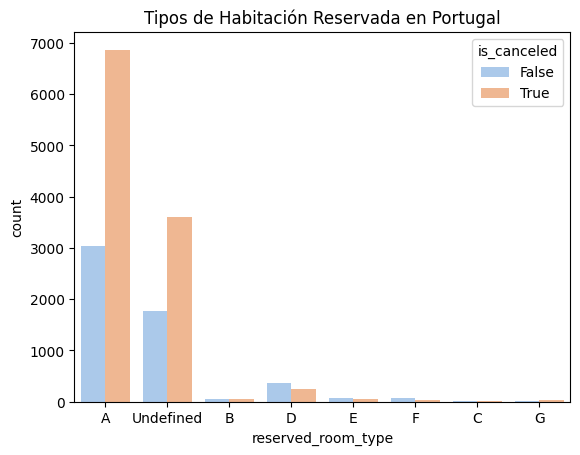

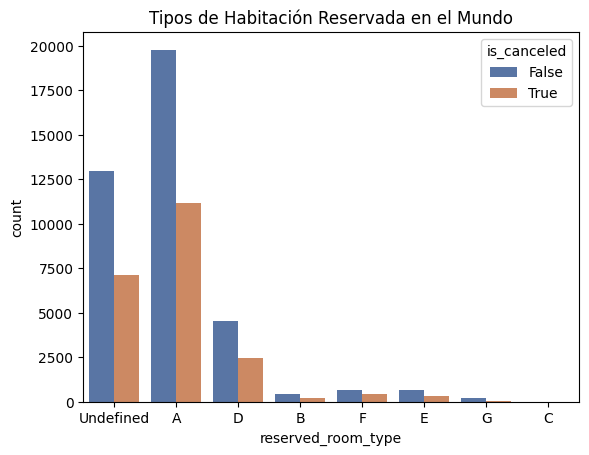

In [99]:
sns.countplot(x='reserved_room_type', hue='is_canceled', data=df_portugal, palette='pastel')
plt.title("Tipos de Habitación Reservada en Portugal")
plt.show()

sns.countplot(x='reserved_room_type', hue='is_canceled', data=df_world, palette='deep')
plt.title("Tipos de Habitación Reservada en el Mundo")
plt.show()

In [102]:
df_undefined = df[df['country'] == 'Undefined']

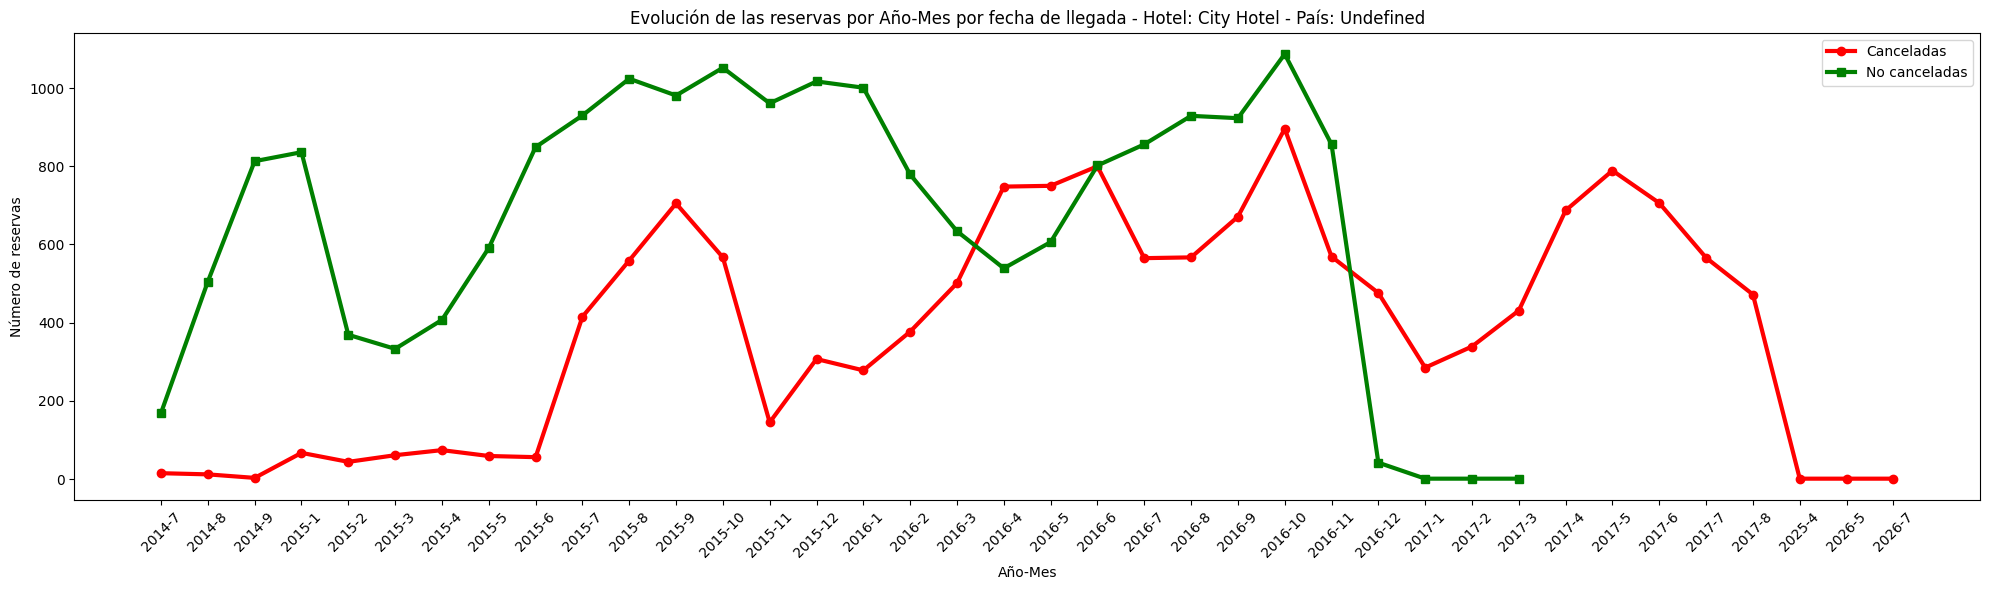

In [103]:
# Segundo conjunto de datos basado en la fecha de llegada y el hotel
cancelada_llegada = df_undefined[(df_undefined["is_canceled"] == True) & (df_undefined["hotel"] == "City Hotel")].groupby([df_undefined["arrival_date"].dt.year, df_undefined["arrival_date"].dt.month])["is_canceled"].count()
no_cancelada_llegada = df_undefined[(df_undefined["is_canceled"] == False) & (df_undefined["hotel"] == "City Hotel")].groupby([df_undefined["arrival_date"].dt.year, df_undefined["arrival_date"].dt.month])["is_canceled"].count()

etiquetas_x_llegada = [f'{año}-{mes}' for año, mes in cancelada_llegada.index]
posiciones_x_llegada = list(range(len(etiquetas_x_llegada)))

plt.figure(figsize=(20, 6))

# Trazar la línea para is_canceled == True (fecha de llegada)
cancelada_llegada.plot(kind='line', marker='o', linestyle='-', color='red', linewidth=3, label='Canceladas')
# Trazar la línea para is_canceled == False (fecha de llegada)
no_cancelada_llegada.plot(kind='line', marker='s', linestyle='-', color='green', linewidth=3, label='No canceladas')

plt.title('Evolución de las reservas por Año-Mes por fecha de llegada - Hotel: City Hotel - País: Undefined')
plt.xlabel('Año-Mes')
plt.ylabel('Número de reservas')

plt.xticks(posiciones_x_llegada, etiquetas_x_llegada, color="black", fontsize=10, rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

Respecto a los Undefined, parece que empezó a empeorar en enero de 2016, pero no es tan radical como en el caso de Portugal.